# Test stuff for PFN model

Classify pions, photons, and **axion1s**

In [1]:
# Add import paths
import sys
sys.path.append("..")

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import datetime as dt
from utils import print_gpu_memory

# Make tensorflow not use too much memory
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

disk_dir = "/usatlas/atlas01/atlasdisk/users/atlas_wifeng"

In [2]:
# Get data (~15 sec)
from data import get_data
(X_train, X_val, X_test,
 Y_train, Y_val, Y_test) = get_data("axion1_test/all_jets_point_cloud.npz")

In [3]:
# Build model
from model import PFN
Phi_sizes = [128, 128, 128, 128, 64, 64, 64]
F_sizes = [128, 128, 128, 128, 64, 64, 64]

_, n_particles, n_features = X_train.shape
model = PFN(
    n_features=n_features,
    n_particles=n_particles,
    n_outputs=Y_train.shape[1],
    Phi_sizes=Phi_sizes,
    F_sizes=F_sizes
)

In [ ]:
# Reset training history
history = defaultdict(list)

In [16]:
# Utility functions for training
from train_model import train_model
from collections import defaultdict

def train_iteration(lr, epochs):
    fit_history = train_model(
        model=model, 
        data=(X_train, X_val, Y_train, Y_val),
        lr=lr,
        epochs=epochs
    )
    print(f"\nTracking history... ", end="")
    for key in ["loss", "val_loss", "accuracy", "val_accuracy"]:
        print(key, end=", ")
        history[key].extend(fit_history.history[key])    
    return fit_history

def save_model(name):
    model_dir = f"{disk_dir}/photon-jet/models/pfn"
    cur_date = dt.datetime.now().strftime("%Y-%m-%d")
    model.save(f"{model_dir}/{name}_{cur_date}")

In [5]:
print_gpu_memory()

GPU memory usage
  current: 556.75 KB
  peak:    618.25 KB


In [6]:
print(f"=== Training with lr=2e-4 [{dt.datetime.now()}] ===")
train_iteration(lr=2e-4, epochs=30)

=== Training with lr=2e-4 [2023-06-07 13:05:53.280572] ===
Epoch 1/30
2400/2400 [==============================] - 52s 19ms/step - loss: 1.6397 - accuracy: 0.3362 - val_loss: 1.1293 - val_accuracy: 0.3352
Epoch 2/30
2400/2400 [==============================] - 46s 19ms/step - loss: 1.1059 - accuracy: 0.3716 - val_loss: 1.1120 - val_accuracy: 0.3744
Epoch 3/30
2400/2400 [==============================] - 46s 19ms/step - loss: 1.0812 - accuracy: 0.3888 - val_loss: 1.0994 - val_accuracy: 0.3804
Epoch 4/30
2400/2400 [==============================] - 45s 19ms/step - loss: 1.0744 - accuracy: 0.3952 - val_loss: 1.0745 - val_accuracy: 0.4009
Epoch 5/30
2400/2400 [==============================] - 45s 19ms/step - loss: 1.0689 - accuracy: 0.4022 - val_loss: 1.0664 - val_accuracy: 0.4076
Epoch 6/30
2400/2400 [==============================] - 45s 19ms/step - loss: 1.0643 - accuracy: 0.4083 - val_loss: 1.0524 - val_accuracy: 0.4188
Epoch 7/30
2400/2400 [==============================] - 45s 19ms/

In [9]:
print(f"=== Training with lr=2e-4 [{dt.datetime.now()}] ===")
train_iteration(lr=2e-4, epochs=30)

=== Training with lr=2e-5 [2023-06-07 13:29:32.201938] ===
Epoch 1/30
2400/2400 [==============================] - 54s 19ms/step - loss: 0.4554 - accuracy: 0.8111 - val_loss: 0.4078 - val_accuracy: 0.8319
Epoch 2/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.5067 - accuracy: 0.7844 - val_loss: 0.4137 - val_accuracy: 0.8323
Epoch 3/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.4617 - accuracy: 0.8071 - val_loss: 0.5100 - val_accuracy: 0.7787
Epoch 4/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.4564 - accuracy: 0.8102 - val_loss: 0.4189 - val_accuracy: 0.8240
Epoch 5/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.4856 - accuracy: 0.7949 - val_loss: 0.4598 - val_accuracy: 0.8093
Epoch 6/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.4355 - accuracy: 0.8191 - val_loss: 0.5578 - val_accuracy: 0.7620
Epoch 7/30
2400/2400 [==============================] - 45s 19ms/

In [12]:
print(f"=== Training with lr=2e-5 [{dt.datetime.now()}] ===")
train_iteration(lr=2e-5, epochs=30)

=== Training with lr=2e-5 [2023-06-07 13:59:35.507396] ===
Epoch 1/30
2400/2400 [==============================] - 51s 19ms/step - loss: 0.2704 - accuracy: 0.8942 - val_loss: 0.2245 - val_accuracy: 0.9138
Epoch 2/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.2233 - accuracy: 0.9152 - val_loss: 0.2111 - val_accuracy: 0.9217
Epoch 3/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.2047 - accuracy: 0.9237 - val_loss: 0.1860 - val_accuracy: 0.9333
Epoch 4/30
2400/2400 [==============================] - 46s 19ms/step - loss: 0.1950 - accuracy: 0.9276 - val_loss: 0.1822 - val_accuracy: 0.9333
Epoch 5/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.1856 - accuracy: 0.9319 - val_loss: 0.1958 - val_accuracy: 0.9274
Epoch 6/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.1779 - accuracy: 0.9344 - val_loss: 0.1701 - val_accuracy: 0.9388
Epoch 7/30
2400/2400 [==============================] - 45s 19ms/

In [13]:
print(f"=== Training with lr=2e-6 [{dt.datetime.now()}] ===")
train_iteration(lr=2e-6, epochs=45)

=== Training with lr=2e-6 [2023-06-07 14:50:58.393211] ===
Epoch 1/45
2400/2400 [==============================] - 57s 19ms/step - loss: 0.0900 - accuracy: 0.9704 - val_loss: 0.0929 - val_accuracy: 0.9691
Epoch 2/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0882 - accuracy: 0.9711 - val_loss: 0.0913 - val_accuracy: 0.9699
Epoch 3/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0875 - accuracy: 0.9714 - val_loss: 0.0911 - val_accuracy: 0.9703
Epoch 4/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0869 - accuracy: 0.9715 - val_loss: 0.0899 - val_accuracy: 0.9707
Epoch 5/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0866 - accuracy: 0.9716 - val_loss: 0.0898 - val_accuracy: 0.9710
Epoch 6/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0860 - accuracy: 0.9718 - val_loss: 0.0943 - val_accuracy: 0.9685
Epoch 7/45
2400/2400 [==============================] - 45s 19ms/

KeyboardInterrupt: 

In [17]:
save_model("axion1_97%")

INFO:tensorflow:Assets written to: /usatlas/atlas01/atlasdisk/users/atlas_wifeng/photon-jet/models/pfn/axion1_97%_2023-06-07/assets


### Testing

In [18]:
# Test model
from test_model import test_model, plot_cm
test_accuracy, cm = test_model(model, (X_test, Y_test))
print(f"Testing accuracy: {test_accuracy}")

60/60 [==============================] - 2s 29ms/step
Testing accuracy: 0.9709666666666666


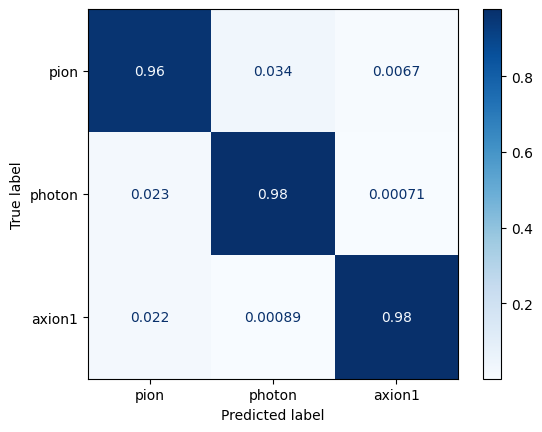

In [19]:
plot_cm(cm, ["pion", "photon", "axion1"])